# Scene Text Detection with CRAFT

This notebook uses an open source implementation of the paper [Character Region Awareness for Text Detection](https://arxiv.org/abs/1904.01941) to detect scene text on a given image.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install CRAFT

 Install the open source project [CRAFT-pytorch](https://github.com/clovaai/CRAFT-pytorch.git):

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from os.path import exists, join, basename, splitext

# Define the Git repository URL
git_repo_url = 'https://github.com/clovaai/CRAFT-pytorch.git'

# Split the file extension from the repository URL and print it
print(splitext(basename(git_repo_url)))

# Extract the project name from the repository URL
project_name = splitext(basename(git_repo_url))[0]

# Check if the project directory already exists
if not exists(project_name):
    # Clone the repository and install dependencies
    !git clone -q {git_repo_url}
    #!cd {project_name} && pip install -q -r requirements.txt

import sys
sys.path.append(project_name)

import time
import matplotlib
import matplotlib.pylab as plt

# Configure matplotlib to disable grid lines in plots
plt.rcParams["axes.grid"] = False


('CRAFT-pytorch', '.git')


## Download pretrained model

In [3]:
def download_from_google_drive(file_id, file_name):
    # Download a file from the Google Drive link
    !rm -f ./cookie
    !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null

    # Extract the confirmation text from the cookie
    confirm_text = !awk '/download/ {print $NF}' ./cookie
    confirm_text = confirm_text[0]

    # Download the file using the confirmation text and file ID
    !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}


pretrained_model = 'craft_mlt_25k.pth'
if not exists(pretrained_model):
    # Download the pretrained model if it doesn't exist
    !wget -q -O {pretrained_model} 'https://drive.google.com/uc?authuser=0&id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ&export=download'


6.jpg


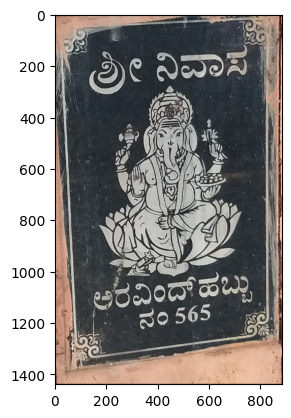

1.jpg


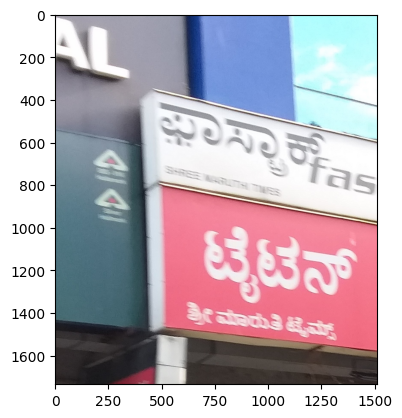

2.jpg


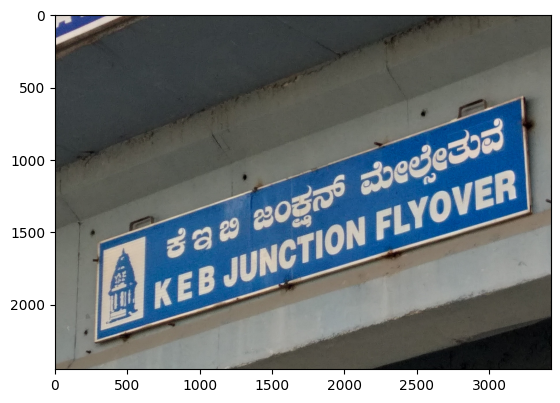

4.jpg


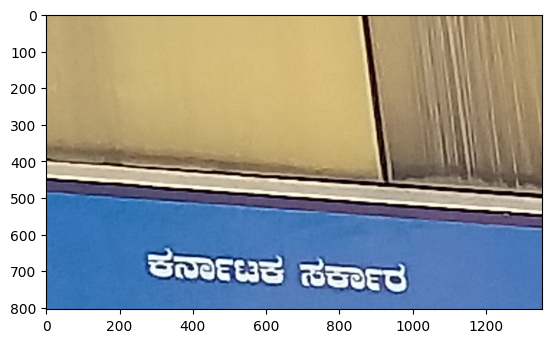

8.jpg


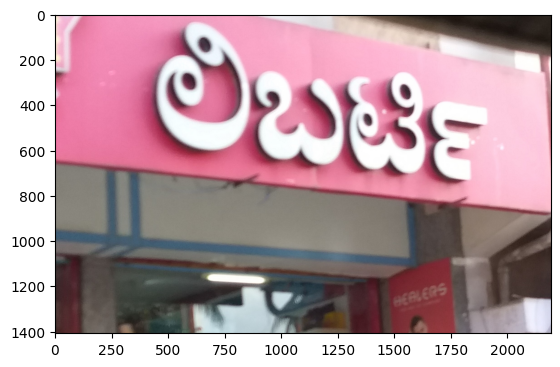

7.jpg


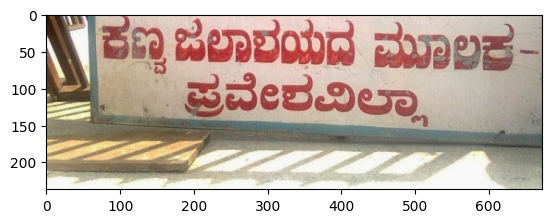

9.jpg


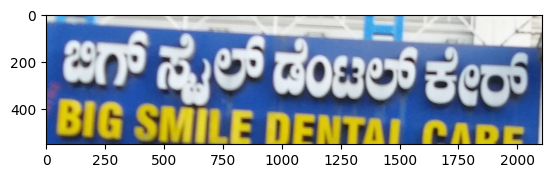

10.jpg


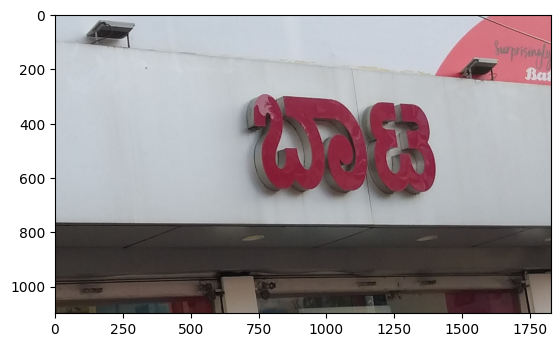

5.jpg


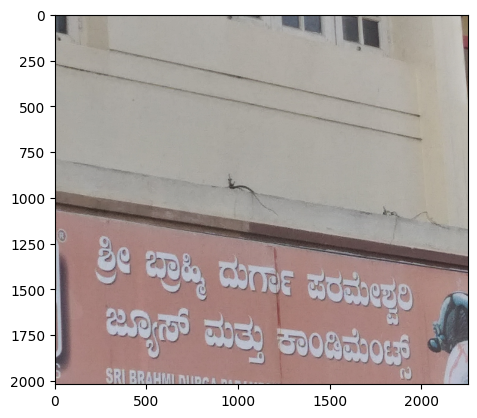

3.jpg


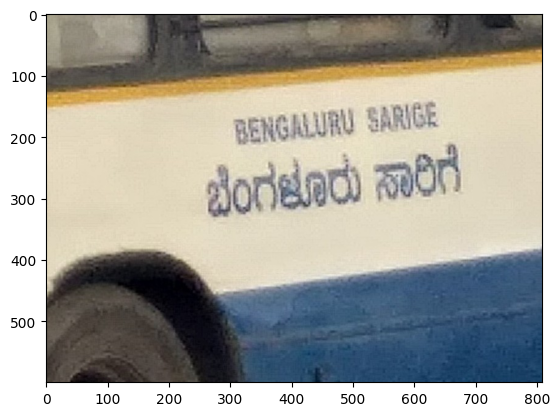

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

# Path to the image folder
image_folder_path = '/content/drive/MyDrive/img'

# Directory to download the images
download_dir = '/content/images'

# Create the download directory if it doesn't exist
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# Iterate over the files in the image folder
for file_name in os.listdir(image_folder_path):
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # Path to the current image file
        image_file_path = os.path.join(image_folder_path, file_name)

        # Extract the image file name
        image_file_name = os.path.basename(image_file_path)

        # Copy the image file to the download directory
        download_path = os.path.join(download_dir, image_file_name)
        shutil.copy(image_file_path, download_path)

        # Load the image using matplotlib
        print(image_file_name)
        img = mpimg.imread(download_path)

        # Perform CRAFT detection on the image
        # ... Your CRAFT detection code goes here ...

        # Display the image with detections
        plt.imshow(img)
        plt.show()


## Detect scene text on a test image

First, dowload a test image from internet:

tv9-kannada-advertising-services-500x500.jpg


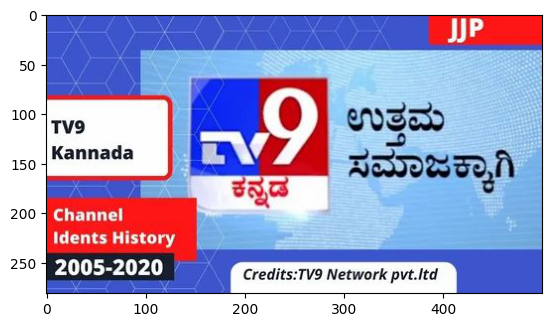

In [4]:
IMAGE_URL = 'https://5.imimg.com/data5/SELLER/Default/2023/3/DH/YO/LQ/58311714/tv9-kannada-advertising-services-500x500.jpg'


image_file_name = basename(IMAGE_URL)
print(image_file_name)
download_dir = '/content/images'
!mkdir -p {download_dir}
!wget -q -P {download_dir} {IMAGE_URL}


plt.imshow(matplotlib.image.imread(join(download_dir, image_file_name)))

Run CRAFT on the above test image:

In [6]:
!cd {project_name} && python test.py --trained_model=/content/{pretrained_model} --test_folder=/content/images

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Loading weights from checkpoint (/content/craft_mlt_25k.pth)
elapsed time : 6.2965779304504395s


In [ ]:
!zip -r /content/download1try.zip /content/CRAFT-pytorch/result

  adding: content/CRAFT-pytorch/result/ (stored 0%)
  adding: content/CRAFT-pytorch/result/res_10_mask.jpg (deflated 15%)
  adding: content/CRAFT-pytorch/result/res_3_mask.jpg (deflated 16%)
  adding: content/CRAFT-pytorch/result/res_7.txt (deflated 35%)
  adding: content/CRAFT-pytorch/result/res_6.jpg (deflated 0%)
  adding: content/CRAFT-pytorch/result/res_3.jpg (deflated 2%)
  adding: content/CRAFT-pytorch/result/res_1.txt (deflated 45%)
  adding: content/CRAFT-pytorch/result/res_2.txt (deflated 46%)
  adding: content/CRAFT-pytorch/result/res_5_mask.jpg (deflated 9%)
  adding: content/CRAFT-pytorch/result/res_9.txt (deflated 48%)
  adding: content/CRAFT-pytorch/result/res_4_mask.jpg (deflated 26%)
  adding: content/CRAFT-pytorch/result/res_7_mask.jpg (deflated 4%)
  adding: content/CRAFT-pytorch/result/res_2_mask.jpg (deflated 12%)
  adding: content/CRAFT-pytorch/result/res_7.jpg (deflated 4%)
  adding: content/CRAFT-pytorch/result/res_8.jpg (deflated 2%)
  adding: content/CRAFT-pyt

In [ ]:
from google.colab import files
files.download("/content/download1try.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now, visualize the result:

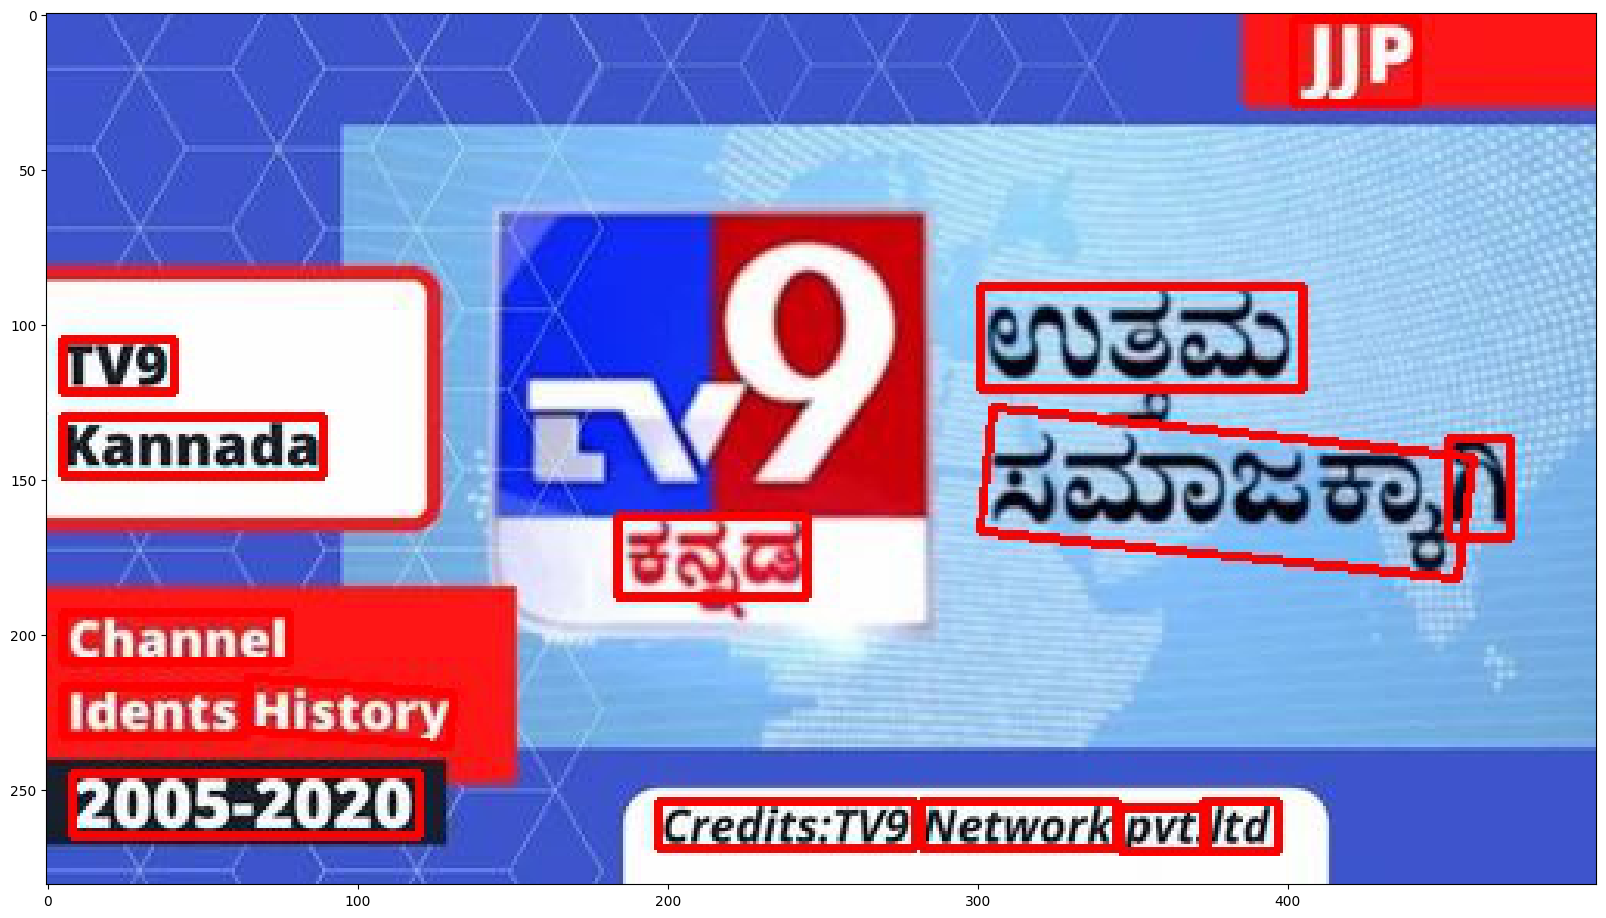

In [ ]:
plt.figure(figsize=(20, 26))
plt.imshow(matplotlib.image.imread(join(project_name, 'result','res_'+image_file_name)))